# Porto Seguro's Safe Drive Prediction

## Data PreProcessing

### Information from Kaggle

- `bin` indicates a binary feature
- `cat` indicates a categorical feature
- other features are either continuous or ordinal
- `-1` indicates missing data

In [50]:
# Importing needed libraries 
%matplotlib inline
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [3]:
# Import the dataset
dataset = pd.read_csv("data/train.csv")
# Create dataframe
df = pd.DataFrame(dataset)
# Check dataset
df.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


### Drop Missing Values

In [22]:
X = df.iloc[:, 2:] # dropping the id and target columns
y = df["target"] # just the target column

In [25]:
shape = X.shape # Original shape of X is (595212, 57)
X_no_missing_values = X.replace(-1, np.NaN) # replace the -1 values with NaN, since they indicate missing data
X_no_missing_values.dropna(inplace=True) # New shape of X is (124931, 57)

[TODO Idea] We can use `fillna()` to fill the missing values with the mean, we can also do this with scikit-learn's `SimpleImputer`

In [29]:
# We only have numerical data types :) 

### Scaling the Data

In [31]:
# Normalisation
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
X_minmax_scaled = mm.fit_transform(X_no_missing_values)

In [37]:
# Standardisation 
from sklearn.preprocessing import StandardScaler
sta = StandardScaler()
X_stand_scaled = sta.fit_transform(X_no_missing_values) # watch out: there are negative values!

## Exploratory Data Analysis

In [40]:
# Check for duplicate rows
duplicate_rows = X_no_missing_values[X_no_missing_values.duplicated()]
print("Number of duplicate rows: ", duplicate_rows)

Number of duplicate rows:  Empty DataFrame
Columns: [ps_ind_01, ps_ind_02_cat, ps_ind_03, ps_ind_04_cat, ps_ind_05_cat, ps_ind_06_bin, ps_ind_07_bin, ps_ind_08_bin, ps_ind_09_bin, ps_ind_10_bin, ps_ind_11_bin, ps_ind_12_bin, ps_ind_13_bin, ps_ind_14, ps_ind_15, ps_ind_16_bin, ps_ind_17_bin, ps_ind_18_bin, ps_reg_01, ps_reg_02, ps_reg_03, ps_car_01_cat, ps_car_02_cat, ps_car_03_cat, ps_car_04_cat, ps_car_05_cat, ps_car_06_cat, ps_car_07_cat, ps_car_08_cat, ps_car_09_cat, ps_car_10_cat, ps_car_11_cat, ps_car_11, ps_car_12, ps_car_13, ps_car_14, ps_car_15, ps_calc_01, ps_calc_02, ps_calc_03, ps_calc_04, ps_calc_05, ps_calc_06, ps_calc_07, ps_calc_08, ps_calc_09, ps_calc_10, ps_calc_11, ps_calc_12, ps_calc_13, ps_calc_14, ps_calc_15_bin, ps_calc_16_bin, ps_calc_17_bin, ps_calc_18_bin, ps_calc_19_bin, ps_calc_20_bin]
Index: []

[0 rows x 57 columns]


<AxesSubplot:xlabel='ps_ind_02_cat'>

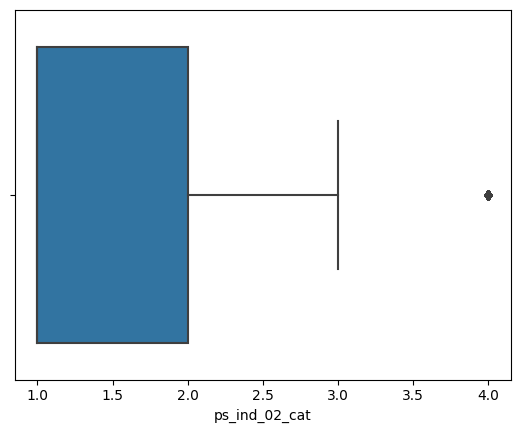

In [42]:
# Detecting Outliers
sns.boxplot(x=X_no_missing_values['ps_ind_02_cat'])

In [46]:
Q1 = X_no_missing_values.quantile(0.25)
Q3 = X_no_missing_values.quantile(0.75)
IQR = Q3 - Q1
print("Our inter-quartile ranges are: ", IQR)

Our inter-quartile ranges are:  ps_ind_01          4.000000
ps_ind_02_cat      1.000000
ps_ind_03          4.000000
ps_ind_04_cat      1.000000
ps_ind_05_cat      0.000000
ps_ind_06_bin      1.000000
ps_ind_07_bin      1.000000
ps_ind_08_bin      0.000000
ps_ind_09_bin      0.000000
ps_ind_10_bin      0.000000
ps_ind_11_bin      0.000000
ps_ind_12_bin      0.000000
ps_ind_13_bin      0.000000
ps_ind_14          0.000000
ps_ind_15          6.000000
ps_ind_16_bin      1.000000
ps_ind_17_bin      0.000000
ps_ind_18_bin      0.000000
ps_reg_01          0.300000
ps_reg_02          0.600000
ps_reg_03          0.525329
ps_car_01_cat      4.000000
ps_car_02_cat      0.000000
ps_car_03_cat      1.000000
ps_car_04_cat      0.000000
ps_car_05_cat      1.000000
ps_car_06_cat     10.000000
ps_car_07_cat      0.000000
ps_car_08_cat      1.000000
ps_car_09_cat      0.000000
ps_car_10_cat      0.000000
ps_car_11_cat     66.000000
ps_car_11          1.000000
ps_car_12          0.108036
ps_car_13       

In [48]:
df = X_no_missing_values
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape # (124931, 57)

(12714, 57)

### Heat Maps

To find dependent features. 

<AxesSubplot:>

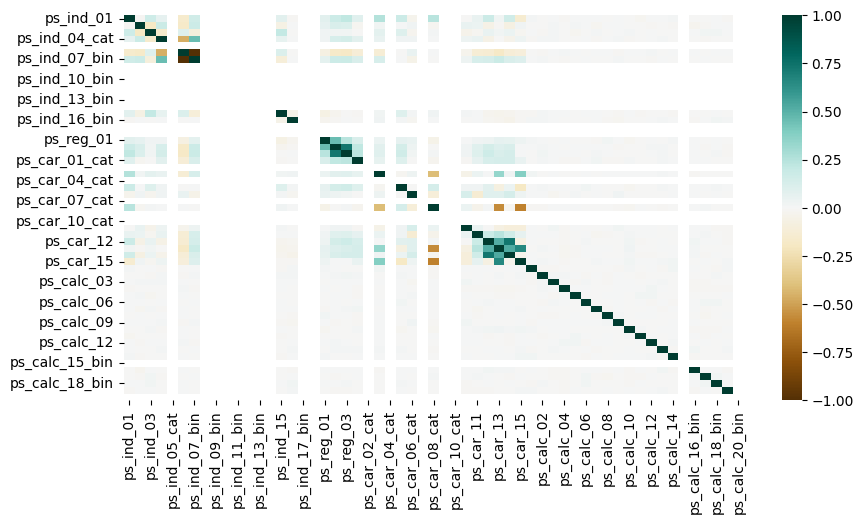

In [53]:
plt.figure(figsize=(10, 5))
c = df.corr() # Compute pairwise correlation of columns
sns.heatmap(c, cmap='BrBG')

[TODO Ideas] Check out methods of feature extraction or reduction